# Informe de Laboratorio 1 - Grupo 4
--------------------------------------------------------------------

## Integrantes

- Nicolas Diaz Montaña - n.diaz9 - 202021006

- Julio Alexander Peña Tovar - 

- Sebastian Enrique Casanova Ospina - s.casanovao - 202115116


## Objetivos

El siguiente informe tiene los objetivos de:

- Aplicar el proceso de aprendizaje para resolver una tarea de agrupación, desde la preparación de los datos hasta la interpretación de los resultados.
<br><br>
- Aplicar tres algoritmos de clústering (k-means y dos de libre elección) para resolver el objetivo de la organización.
<br><br>
- Determinar los hiperparámetros para la construcción de los modelos dependiendo de los algoritmos utilizados.
<br><br>
- Recomendar el algoritmo más adecuado a la organización con base en una tabla comparativa que muestre el rendimiento de los tres modelos construidos.
<br><br>
- Derivar conclusiones a partir de los mejores grupos identificados, que sean útiles para la organización. Comunicar los hallazgos encontrados a la organización, explicando por qué tienen valor para el negocio.

## 1. Entendimiento de Datos

## 1.1. Enunciado del Negocio

En el vasto panorama del mundo empresarial, la comprensión profunda de los clientes es la clave para el éxito sostenible. La segmentación de clientes emerge como una poderosa herramienta estratégica que redefine la forma en que las empresas abordan sus mercados. Este proceso implica la división cuidadosa y deliberada de la base de clientes en grupos homogéneos, con características y comportamientos similares. La segmentación de clientes va más allá de la simple categorización; es la llave maestra que desbloquea el potencial de la personalización. Al centrarse en las similitudes y preferencias compartidas dentro de cada segmento, las empresas pueden anticipar las necesidades de sus clientes, crear mensajes más efectivos y diseñar productos y servicios que resuenen con precisión.
<br>
<br>
AlpesInsight, es una empresa pionera en la intersección de servicios financieros y tecnología. En su búsqueda constante para ofrecer experiencias personalizadas y seguras a sus clientes, AlpesInsight está expandiendo su equipo con la incorporación de expertos en aprendizaje automático para enfrentar el desafío de aprovechar datos de transacciones con tarjetas de crédito para comprender los patrones de comportamiento y preferencias de los clientes. AlpesInsight se esfuerza por desarrollar soluciones innovadoras que permitan personalizar ofertas financieras y servicios, mejorando así la satisfacción del cliente y fortaleciendo la seguridad de las transacciones.

## 1.2. Carga de librerias necesarias y carga de datos

Lo primero ha realizar es descargar las librerias correspondientes que se va a utilizar para la completa realiacion del laboratorio. A su vez, se descargaran los datos del csv donde se encuentra la informacion de los clientes. 

In [47]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Se cargan los datos. 
# Recuerde ajustar el directorio si lo requiere para encontrar los datos
df_customer=pd.read_csv("data\Agrupación_Customer_Data.csv", sep=',', encoding = "ISO-8859-1")

Una vez realizado la carga de los dato empezaremos con el entedimiento de los datos para ver como se ajustan al contexto de negocio, ademas de hacer un analisis para comprobar la calidad de los mismos.

## 1.3. Perfilamiento de datos

In [48]:
df_customer.shape

(8961, 18)

In [49]:
df_customer.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,NaN,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [50]:
# Revisar las características de los datos: completitud y tipo de dato
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

**Análisis** 
<br><br>
Aqui podemos notar que puede haber algunas incongruencias como que existen columnas con datos nulos.

In [51]:
# Resumen de los estadisticos de las variables numéricas
df_customer.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [52]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_customer.select_dtypes(include = ['object']).columns
name_cols_non_number

#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_customer[name_cols_non_number].describe()

,CUST_ID,BALANCE
count,8961,8961
unique,8950,8871
top,C10298,0
freq,4,80


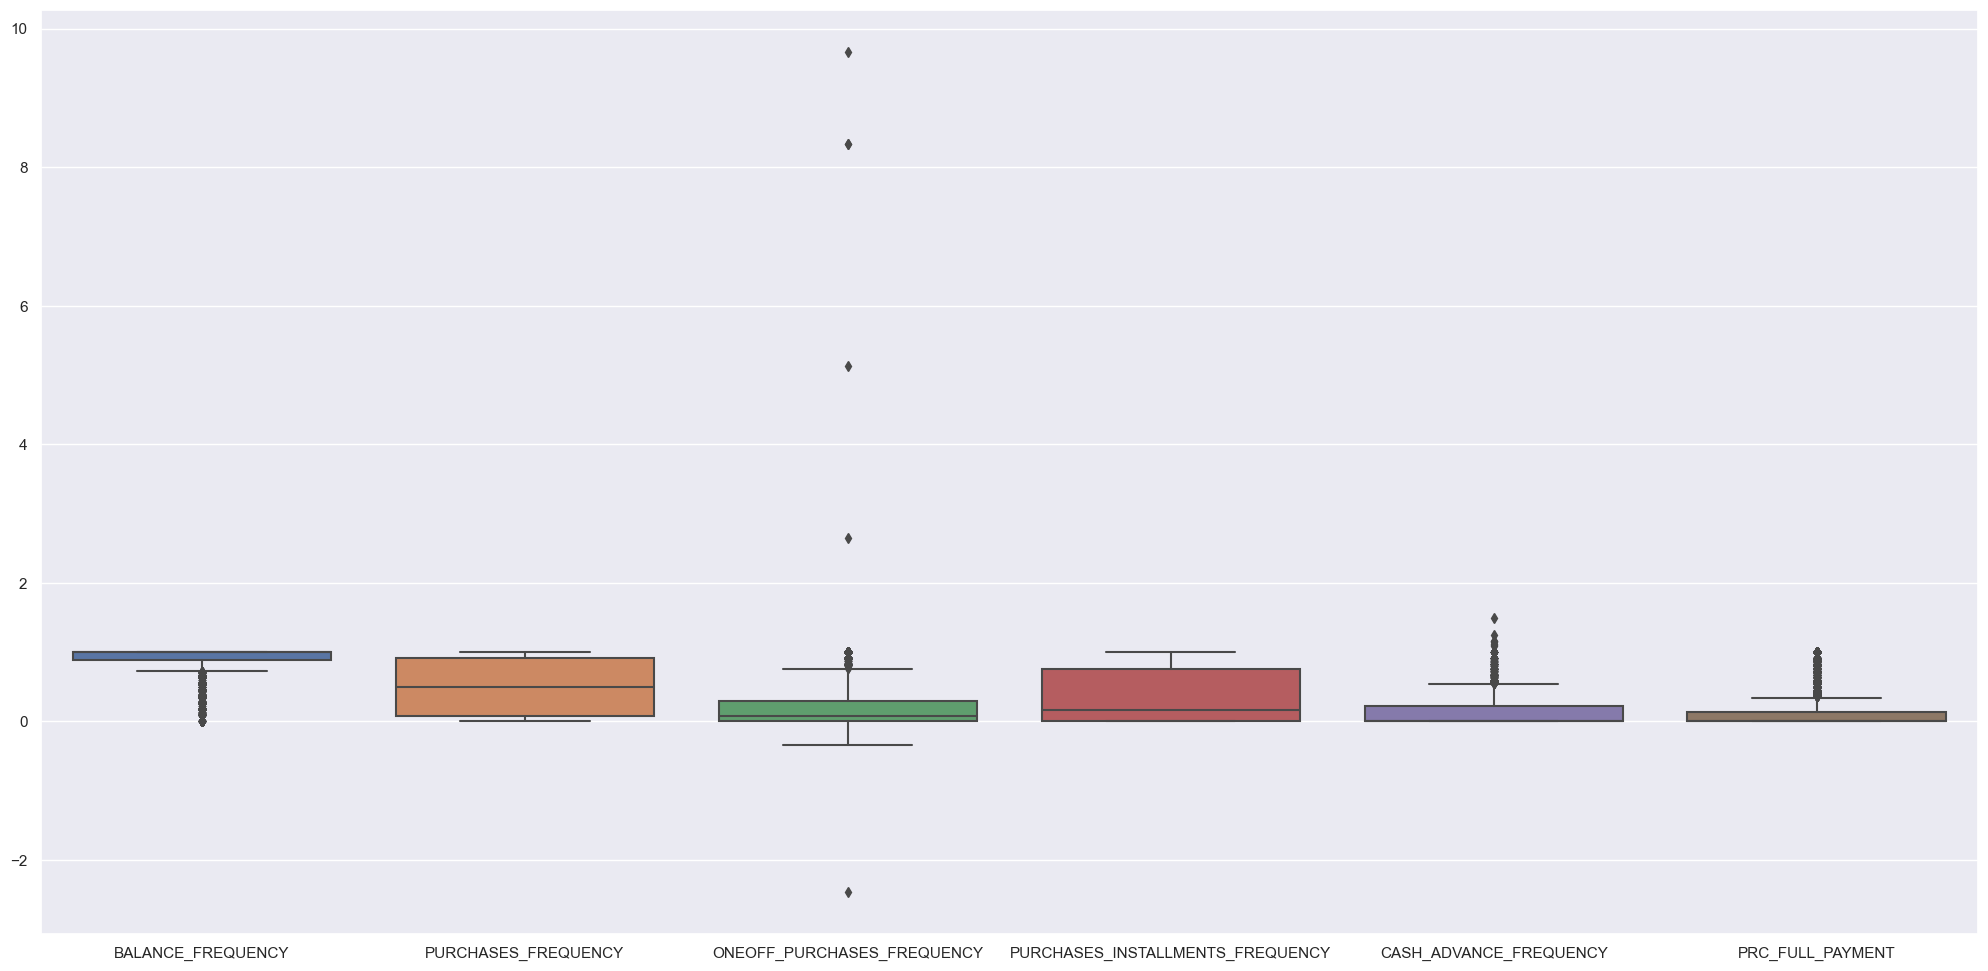

In [53]:
#Seleccion de las frecuencias de los balances de la cuenta y los tipos de de compra
name_cols_frequency = ["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]

#Visualización de todas las variables numéricas de iipo Float
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=df_customer[name_cols_frequency], orient="v")

**Análisis** 
<br><br>
Aqui se puede observar que hay varios valores atipicos que se evidencia en las columnas de Compra unica y adelante en efectivo. Donde algunos valores sobrepasan el limite establecido del rango entre [0,1] que representa el porcentaje de frecuencia. Por ejemplo, en la columna de Compra unica hay un valor llega casi a 10, lo que significaria una frecuencia del 1000%.

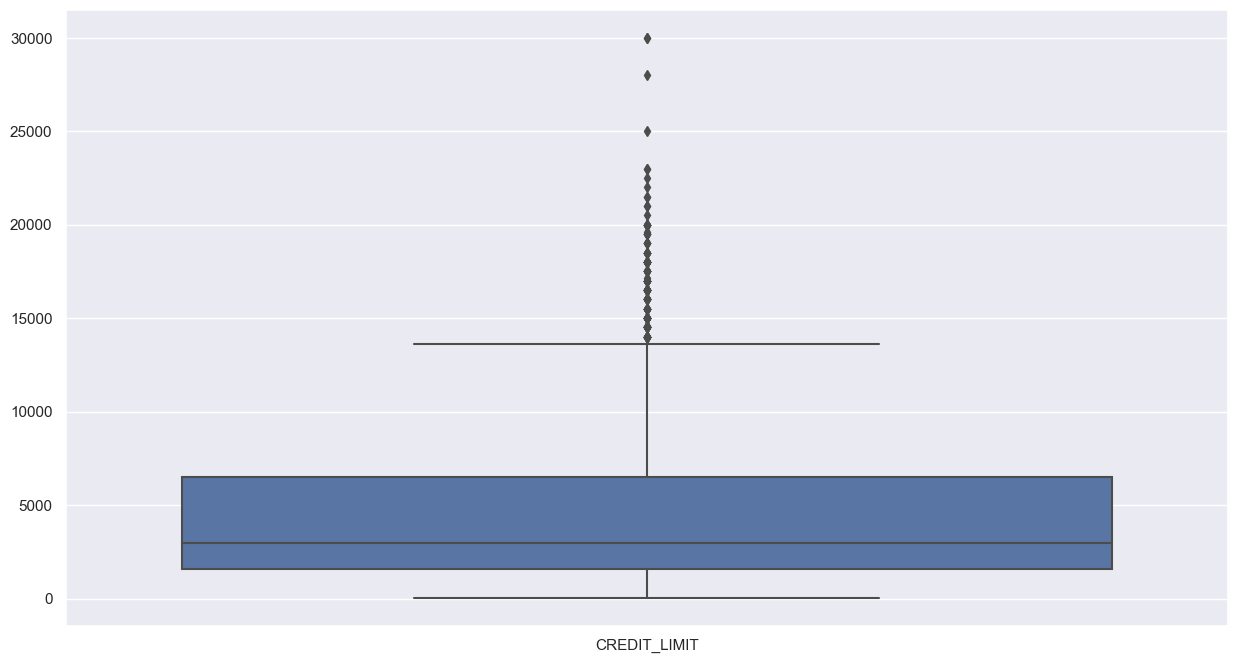

In [54]:
name_col_limit = ["CREDIT_LIMIT"]

#Visualización de todas las variables numéricas de iipo Float
fig=plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df_customer[name_col_limit], orient="v")

In [55]:
df_customer.TENURE.value_counts()

TENURE
 12    7589
 11     366
 10     236
 6      205
 8      196
 7      190
 9      175
-12       3
-29       1
Name: count, dtype: int64

**Análisis** 
<br><br>
Aqui podemos notar que tenemos datos que no tiene sentido con respecto al contexto y descripcion de la columna TENURE, la cual describe por cuanto tiempo ha sido cliente esa instancia. Los datos negativos son los que provocan un problema.

In [56]:
#Ver relaciones entre las variables: "PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_TRX"
cols_select=["PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_TRX", "CASH_ADVANCE"]
df_customer_cols_sels=df_customer[cols_select].copy()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


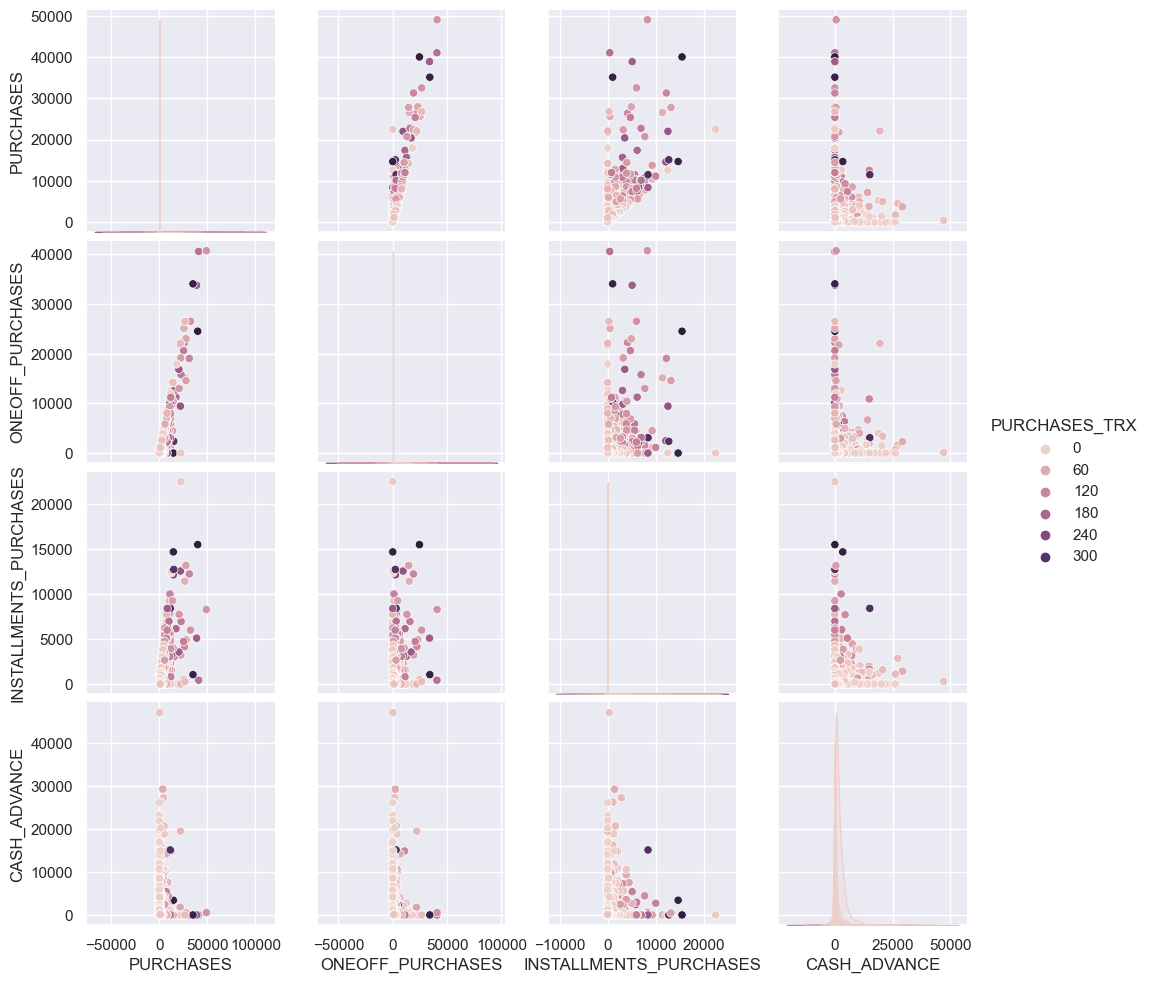

In [57]:
# En esta gráfica van a ver las relaciones entre PURCHASES_TRX y las otras variables numéricas
sns.pairplot(data=df_customer_cols_sels, hue="PURCHASES_TRX")

In [58]:
#Ver relaciones entre las variables: "CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT"
cols_select=["CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT"]
df_customer_cols_sels=df_customer[cols_select].copy()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


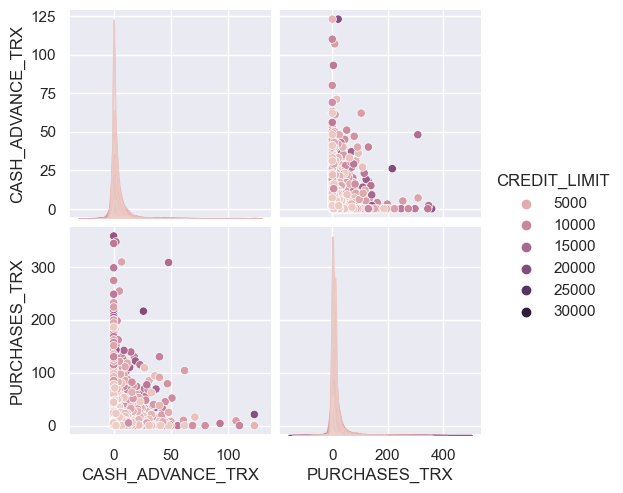

In [59]:
# En esta gráfica van a ver las relaciones entre CREDIT_LIMIT y las otras variables numéricas
sns.pairplot(data=df_customer_cols_sels, hue="CREDIT_LIMIT")

In [60]:
#Ver relaciones entre las variables: "PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"
cols_select=["PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]
df_customer_cols_sels=df_customer[cols_select].copy()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


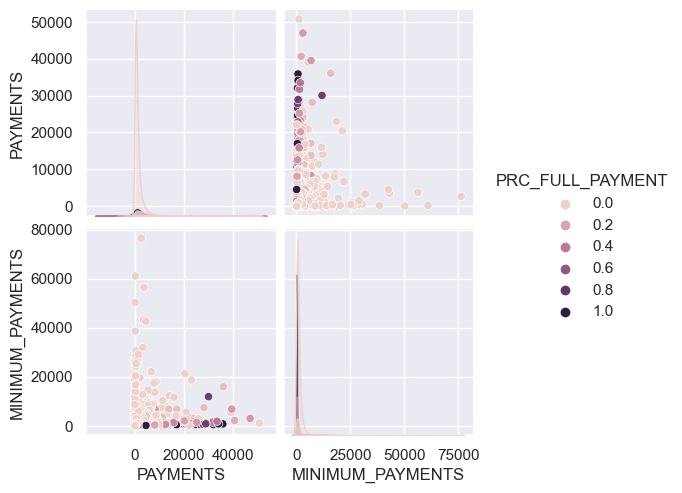

In [61]:
# En esta gráfica van a ver las relaciones entre PRC_FULL_PAYMENT y las otras variables numéricas
sns.pairplot(data=df_customer_cols_sels, hue="PRC_FULL_PAYMENT")

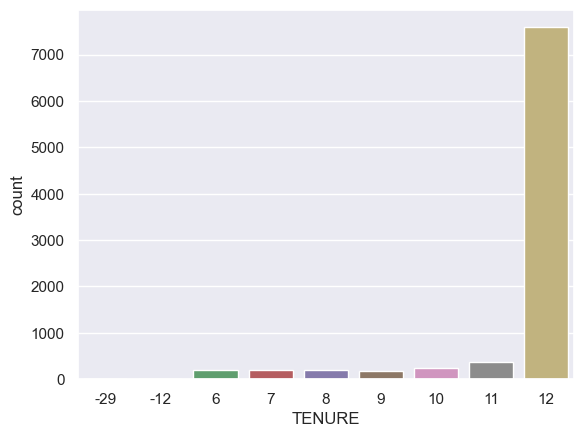

In [62]:
# Visualmente ver la cantidad de valores y de filas x valor
ax = sns.countplot(x='TENURE', data=df_customer)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


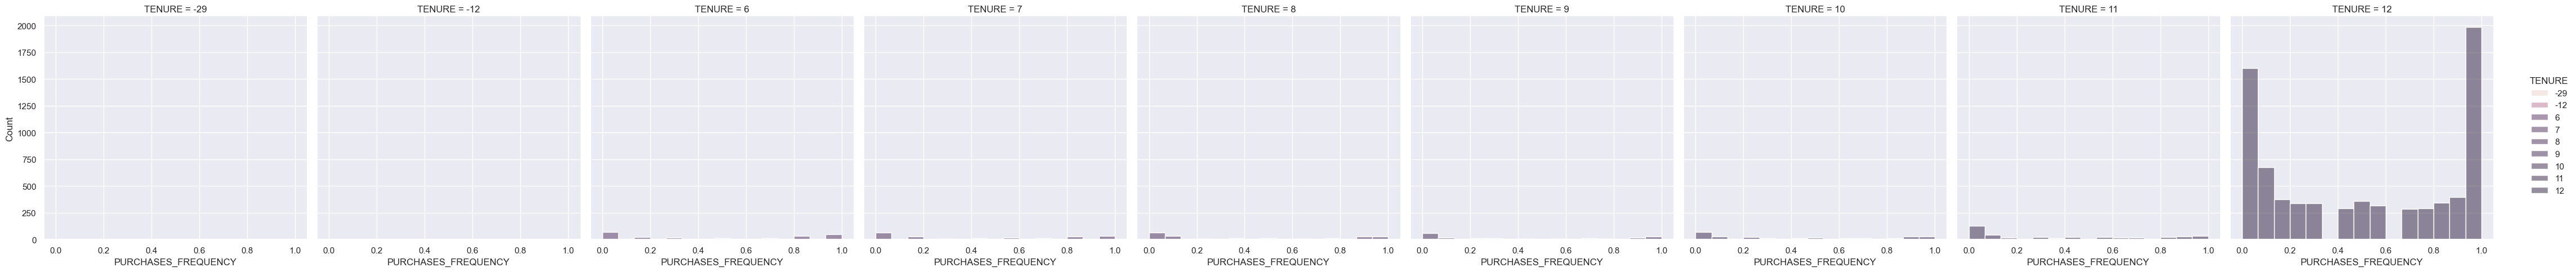

In [63]:
sns.displot(data=df_customer, x="PURCHASES_FREQUENCY", hue="TENURE", col="TENURE")

**Análisis**

//TODO

## 1.3. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez. En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación.

### 1.3.1 Completitud - Análisis de valores nulos o vacíos

In [64]:
# Cálculo de porcentaje de valores nulos por columna
((df_customer.isnull().sum()/df_customer.shape[0])).sort_values(ascending=False)

MINIMUM_PAYMENTS                    0.034929
ONEOFF_PURCHASES_FREQUENCY          0.001451
CASH_ADVANCE                        0.001116
CREDIT_LIMIT                        0.000781
CUST_ID                             0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE                             0.000000
PURCHASES_FREQUENCY                 0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

En este punto se puede evidencuar que 4 (MINIMUM_PAYMENTS, ONEOFF_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT) columnas tienen un porcentaje mayor a 0 de datos vacios, lo cual significa que algunas instancias de usuarios tienen huecos en esas columnas. El que mas sobresale es MINIMUM_PAYMENTS con un porcentaje del 0.034929.

Aun asi, se podria argumentar que las instancias vacias de MINIMUM_PAYMENTS, ONEOFF_PURCHASES, CASH_ADVANCE pueden ser candidatas a ser remplazadas por la  0 por que puede ser que no el usuario no ha hecho ese tipo de movimientos. En cambio CREDIT_LIMIT, puede que no se incluya en los modelos a realizar pero aun asi se podria tener en cuenta remplazar esos valores de la media para no perder la informacion de esas filas.

### 1.3.2. Unicidad

Aqui no puede haber excusas de que hayan duplicados de filas debido al contexto del negocio y a la informacion prevista. En este caso, no puede haber dos clientes con el mismo ID que seria una incongruencia aunque cierta informacion se puede repetir en otras columnas. Lo ideal seria elminarlas para que no generen problemas a la hora de hacer los modelos.

In [65]:
df_customer.duplicated(keep = False).sum()

20

Aqui podemos evidenciar que hubo 20 filas repetidas de 8961.

### 1.3.3. Consistencia

In [66]:
# Aqui revisaremos los valores de variable TENUR, la cual hace referencia del tiempo en meses que lleva el cliente con la empresa.
# Como ya se habia mencionado antes, los valores negativos no tienen mucho sentido por que no se puede decir que un cliente ha estado -29 meses con la empresa.
df_customer.TENURE.value_counts()

TENURE
 12    7589
 11     366
 10     236
 6      205
 8      196
 7      190
 9      175
-12       3
-29       1
Name: count, dtype: int64

In [67]:
# Ver los valores maximos y minimos de las columnas ONEOFF_PURCHASES_FREQUENCY y CASH_ADVANCE_FREQUENCY 
cols_select=["ONEOFF_PURCHASES_FREQUENCY","CASH_ADVANCE_FREQUENCY"]
df_customer_cols_sels=df_customer[cols_select].copy()

df_customer_cols_sels.describe().loc[['min', 'max']]

,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
min,-2.45640,0.0
max,9.66667,1.5


Segun el diccionario de datos, las columnas de frecuencia solo tiene un rango de 0 a 1 dado a que representan un porcentaje del 0 al 100. Pero como se puede evidenciar, estas dos columnas exceden esos limites en especial ONEOFF_PURCHASES_FREQUENCY.

### 1.3.4. Validez

## 2. Preparacion de los datos


### 2.1 Corrección de Validez

Lo primero que debemos hacer para preparar nuestro conjunto de datos es cambiar el tipo de dato de la columna BALANCE. Como vimos previamente al revisar la información de los datos, esta columna tiene como tipo de dato 'object'. Sin embargo, al remitirnos al diccionario de datos y revisar el documento CSV, podemos observar que estos datos son de tipo 'float64', ya que corresponden al promedio del balance mensual. 

In [68]:
# Se cambia el tipo de dato de la columna BALANCE de Object a Float64
#print(df_customer[df_customer['BALANCE'].str.contains('\d+\.\d+')])
df_customer = df_customer[df_customer['BALANCE'].str.contains(r'^[+-]?\d*\.?\d+$')]
df_customer['BALANCE'] = (df_customer["BALANCE"]).astype("float64")
print(df_customer['BALANCE'])

0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8956      28.493517
8957      19.183215
8958      23.398673
8959      13.457564
8960     372.708075
Name: BALANCE, Length: 8955, dtype: float64


**Análisis** 
<br><br>
Al convertir la columna a float pudimos observar que habian unos pocos valores que estaban mal escritos por lo que se procedio a borrar esas filas.